In [111]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#LOAD ALL IMAGES FROM THE DATA FILE
imageList = tf.data.Dataset.list_files(os.path.join('data', '*.png'), 
                                   shuffle = False)
#DONT SHUFFLE TO LINE UP WITH THE TEXT FILES

#LOAD IN ALL THE TEXT FILES
#textList = tf.data.Dataset.list_files(os.path.join('data', '*.txt'), 
#                                   shuffle = False)

#prints all images
#for x in imageList.as_numpy_iterator():
#   print(x)
#for x in textList.as_numpy_iterator():
    #print(x)

In [112]:
def preprocess(filepath):
    # this is the function that will process all the images that are in the image list for basic conversion

    #read image
    img = tf.io.read_file(filepath)
    #load image
    img = tf.io.decode_png(img, channels=3)
    #scaled the image to be 0-1
    img = img / 255

    img = tf.image.central_crop(image=img, central_fraction=0.5)

    #img = tf.image.rgb_to_grayscale(img)


    return img


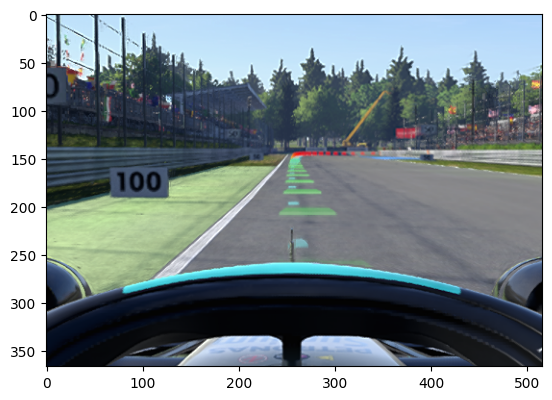

In [113]:
imageList = imageList.map(preprocess)
plt.imshow(imageList.as_numpy_iterator().next(), cmap='gray')

# BRIUNGING IN THE TEXT NOW

In [114]:
def preprocess_text(filepath):

    key = tf.io.read_file(filepath)

    if key == 'up arrow\r\n':
        return [1,0,0,0]
    if key == 'down arrow\r\n':
        return [0,1,0,0]
    if key == 'left arrow\r\n':
        return [1,0,0,0]
    if key == 'right arrow\r\n':
        return [0,0,0,1]
    if key == 'left arrow,up arrow\r\n':
        return [1,0,1,0]
    if key == 'left arrow,down arrow\r\n':
        return [0,1,1,0]
    if key == 'right arrow,up arrow\r\n':
        return [1,0,0,1]
    if key == 'right arrow,down arrow\r\n':
        return [0,1,0,1]
    else:
        print(key)
        return [0,0,0,0]
    return key 

In [115]:
def wrap_array(x1,x2,x3,x4):
    return tf.expand_dims([x1,x2,x3,x4], axis = 0)

In [116]:
textList = tf.data.Dataset.list_files(os.path.join('data', '*.txt'), 
                                   shuffle = False)
textList = textList.map(lambda x: tf.py_function(preprocess_text, [x], ([tf.int16, tf.int16, tf.int16, tf.int16,])))
textList = textList.map(wrap_array)

for x in textList.as_numpy_iterator():
    print(x)

[[1 0 0 0]]
[[0 1 0 1]]
[[0 1 0 1]]
[[0 1 0 1]]
[[0 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[0 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 1]]
[[0 1 0 1]]
[[0 0 0 1]]
[[1 0 0 1]]
[[0 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 

In [117]:
def unwrap(x, y):
    return x, tf.squeeze(y)

In [118]:
dataset = tf.data.Dataset.zip((imageList, textList))
x, y = dataset.as_numpy_iterator().next()
len(dataset)
dataset = dataset.cache()
dataset = dataset.shuffle(40)
dataset = dataset.batch(8)
dataset = dataset.prefetch(4)
dataset = dataset.map(unwrap)


len(dataset)
x, y = dataset.as_numpy_iterator().next()



# model


In [134]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Input

model = Sequential()

print(imageList.as_numpy_iterator().next().shape)

model.add(keras.Input(shape=((366, 516, 3))))

model.add(Conv2D(64,  #filters
                  5,  #kernel size
                  strides = (3,3),   #reducing the compression so its not 400 million parameters lkmfaoooo
                activation = 'relu',  #activation type
                input_shape =((366, 516, 3))))    #input shape (batch, shape as seen above)#

model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Conv2D(128, 4, 
                 strides = (3,3),
                   activation='relu'))

model.add(BatchNormalization())


model.add(Conv2D(128, 4, 
                 strides = (3,3),
                   activation='relu'))


model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(4, activation='softmax'))

(366, 516, 3)


In [135]:
model.summary()



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 121, 171, 64)      4864      
                                                                 
 batch_normalization_42 (Bat  (None, 121, 171, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 60, 85, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 19, 28, 128)       131200    
                                                                 
 batch_normalization_43 (Bat  (None, 19, 28, 128)      512       
 chNormalization)                                                
                                                     

In [136]:
model.compile('adam', tf.losses.CategoricalCrossentropy())

model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2.1493
Epoch 2/500
1/1 [==============================] - 0s 150ms/step - loss: 2.0346
Epoch 3/500
1/1 [==============================] - 0s 150ms/step - loss: 1.6913
Epoch 4/500
1/1 [==============================] - 0s 146ms/step - loss: 1.4995
Epoch 5/500
1/1 [==============================] - 0s 162ms/step - loss: 1.4208
Epoch 6/500
1/1 [==============================] - 0s 165ms/step - loss: 1.3488
Epoch 7/500
1/1 [==============================] - 0s 154ms/step - loss: 1.2594
Epoch 8/500
1/1 [==============================] - 0s 158ms/step - loss: 1.1861
Epoch 9/500
1/1 [==============================] - 0s 151ms/step - loss: 1.1203
Epoch 10/500
1/1 [==============================] - 0s 156ms/step - loss: 1.0626
Epoch 11/500
1/1 [==============================] - 0s 154ms/step - loss: 1.0411
Epoch 12/500
1/1 [==============================] - 0s 155ms/step - loss: 1.0670
Epoch 13/500
1/1 [======================

KeyboardInterrupt: 